# Gradient Descent

* we now have an extra dimension: x2
* x1 and x2 are the *independent variables*
* y is the *dependent variable*

with two x dimensions, we get a plane:

$\hat y = a_1x_1 + a_2x_2 + a_0*1$

the model has 3 parameters (a0, a1, a2)

$\hat y = aX$

a is a vector of parameters, X is a matrix with our input training data. aX is a dot product of a vector and a matrix.

In [1]:
import pandas as pd
import numpy as np

In [80]:
df = pd.read_csv("linear07.csv")
df["bias"] = 1
df.head(3)

,x1,x2,y,bias
0,11.012901,23.071120,104.297382,1
1,3.242083,24.595835,102.625424,1
2,8.976505,22.738804,100.931721,1


#### Problem: how to find the optimal parameters if we cannot use nested loops and try all combinations?

In [3]:
# select training data
X = df[["x1", "x2", "bias"]]  # if you leave away the bias, the regression goes through the origin (0,0)
ytrue = df["y"]

X.shape, ytrue.shape  # X is a 2D matrix, ytrue is a vector

((1000, 3), (1000,))

### Linear Model

In [4]:
def linear_model(X, a):
    return np.dot(X, a)

In [5]:
a = np.array([1, 2, 3])      # arbitrary parameters for testing
yhat = linear_model(X, a)    # output is 1000 values for y
yhat.shape

(1000,)

### Loss Function

In [6]:
def mse(ytrue, yhat):
    return np.mean((ytrue - yhat) ** 2)

In [7]:
mse = lambda ytrue, yhat: np.mean((ytrue - yhat) ** 2)  # same code but messy in bigger program

In [8]:
# test code with example numbers by Paul
a = np.array([1.0, 1.2, 1.4, 1.6])
b = np.array([0.2, 0.4, 0.6, 0.8])

assert round(mse(a, b), 2) == 0.64  # if there is no error it is correct

In [9]:
mse(ytrue, ytrue)  # 0.0 is the smallest possible MSE value

0.0

### Gradient

$a_{new} = a_{old} - \eta \nabla loss(a)$

In [18]:
def partial_derivative(X, ytrue, a, index, mse_old, epsilon=0.0001):
    """determine by how much we have to modify the indexed parameter"""
    a_change = a.copy()
    a_change[index] += epsilon
    ypred_a = linear_model(X=X, a=a_change)
    mse_a = mse(ytrue, ypred_a)
    return (mse_a - mse_old) / epsilon


def calc_gradient(X, ytrue, a):
    ypred = linear_model(X=X, a=a)   # prediction for y with the parameters we have now
    mse_old = mse(ytrue, ypred)

    result = []
    for index in range(3):
        result.append(partial_derivative(X, ytrue, a, index, mse_old))
    return result  # all partial derivatives for each parameter -> list of 3 numbers used to calculate Delta_a

In [78]:
learning_rate = 0.0001

np.random.seed(42)            # set the seed value of the random number generator
a = np.random.random(size=3)  # random parameter vector

history = []
for i in range(1000):    
    gradient = np.array(calc_gradient(X=X, ytrue=ytrue, a=a))
    a -= gradient * learning_rate
    ypred = linear_model(X=X, a=a)
    history.append(mse(ytrue, ypred))
    
    if i > 10 and (history[-2] - history[-1]) < 0.05:
        break
        
a

array([1.04600948, 3.97741096, 0.865807  ])

#### Learning Curve

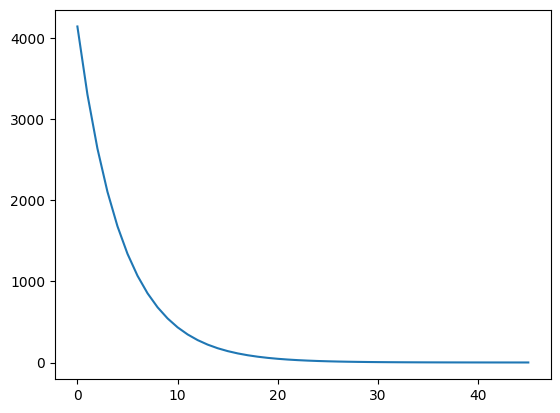

In [79]:
from matplotlib import pyplot as plt

plt.plot(history)